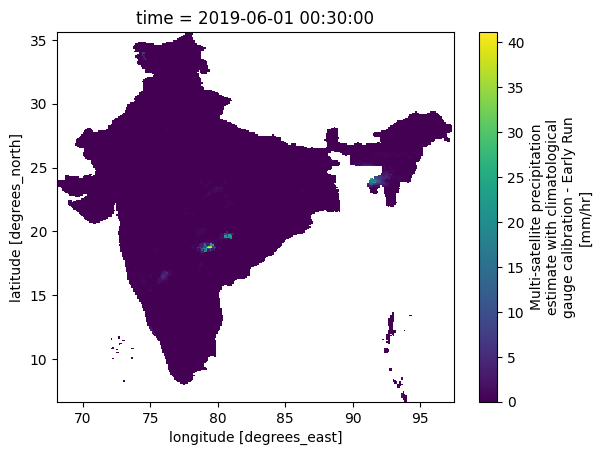

In [205]:
import xarray as xr
GPM_data = xr.open_dataset('../../Desktop/GPM_2019_sample.nc')
GPM_data.coords
GPM_data['GPM_3IMERGHHE_06_precipitationCal'].plot()

In [206]:
GPM_data.dims

Frozen({'time': 1, 'lat': 289, 'lon': 294, 'latv': 2, 'lonv': 2, 'nv': 2})

In [207]:
import numpy as np

In [208]:
lat = np.arange(6.625,35.87,0.25)
print(lat)
len(lat) # these are lats for interpolation

[ 6.625  6.875  7.125  7.375  7.625  7.875  8.125  8.375  8.625  8.875
  9.125  9.375  9.625  9.875 10.125 10.375 10.625 10.875 11.125 11.375
 11.625 11.875 12.125 12.375 12.625 12.875 13.125 13.375 13.625 13.875
 14.125 14.375 14.625 14.875 15.125 15.375 15.625 15.875 16.125 16.375
 16.625 16.875 17.125 17.375 17.625 17.875 18.125 18.375 18.625 18.875
 19.125 19.375 19.625 19.875 20.125 20.375 20.625 20.875 21.125 21.375
 21.625 21.875 22.125 22.375 22.625 22.875 23.125 23.375 23.625 23.875
 24.125 24.375 24.625 24.875 25.125 25.375 25.625 25.875 26.125 26.375
 26.625 26.875 27.125 27.375 27.625 27.875 28.125 28.375 28.625 28.875
 29.125 29.375 29.625 29.875 30.125 30.375 30.625 30.875 31.125 31.375
 31.625 31.875 32.125 32.375 32.625 32.875 33.125 33.375 33.625 33.875
 34.125 34.375 34.625 34.875 35.125 35.375 35.625]


117

In [209]:
lng = np.arange(68.12,97.87,0.25)
print(lng) # these are longitudes for interpolation
len(lng)

[68.12 68.37 68.62 68.87 69.12 69.37 69.62 69.87 70.12 70.37 70.62 70.87
 71.12 71.37 71.62 71.87 72.12 72.37 72.62 72.87 73.12 73.37 73.62 73.87
 74.12 74.37 74.62 74.87 75.12 75.37 75.62 75.87 76.12 76.37 76.62 76.87
 77.12 77.37 77.62 77.87 78.12 78.37 78.62 78.87 79.12 79.37 79.62 79.87
 80.12 80.37 80.62 80.87 81.12 81.37 81.62 81.87 82.12 82.37 82.62 82.87
 83.12 83.37 83.62 83.87 84.12 84.37 84.62 84.87 85.12 85.37 85.62 85.87
 86.12 86.37 86.62 86.87 87.12 87.37 87.62 87.87 88.12 88.37 88.62 88.87
 89.12 89.37 89.62 89.87 90.12 90.37 90.62 90.87 91.12 91.37 91.62 91.87
 92.12 92.37 92.62 92.87 93.12 93.37 93.62 93.87 94.12 94.37 94.62 94.87
 95.12 95.37 95.62 95.87 96.12 96.37 96.62 96.87 97.12 97.37 97.62]


119

In [210]:
# now we will fit these lat and longs to our file and see the differrence 
# currently there are 289 lats and 294 lons , we have to set it to 117 X 119
ln = GPM_data['lat']
ln
ln = ln.interp(lat=lat)
ln
GPM_data = GPM_data.interp(lat=ln,method="nearest")
GPM_data['lat'].shape

(117,)

In [211]:
GPM_data = GPM_data.interp(lon=lng,method="nearest")
GPM_data['lon'].shape

(119,)

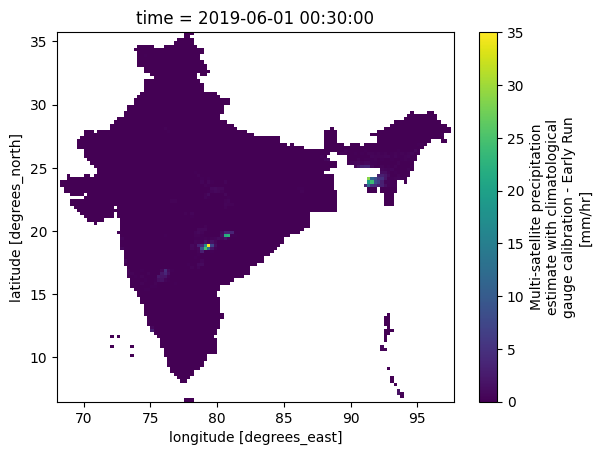

In [212]:
GPM_data['GPM_3IMERGHHE_06_precipitationCal'].plot()

In [213]:
GPM_data['GPM_3IMERGHHE_06_precipitationCal'].values.shape

(1, 117, 119)

In [214]:
# GPM_data.to_netcdf('./A_interpoled_GPM_data.nc')